In [1]:
import tensorflow as tf
import keras
import numpy as np
from keras import layers, models



(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

FLATTEN_DIM = 28 * 28
TRAINING_SIZE = len(train_images)
TEST_SIZE = len(test_images)
# 把資料攤平成1個維度 28*28 -> 784
trainImages = np.reshape(train_images, (TRAINING_SIZE, FLATTEN_DIM))
testImages = np.reshape(test_images, (TEST_SIZE, FLATTEN_DIM))
print(type(trainImages[0]), trainImages.shape, trainImages[0].shape)

# 將圖數值標準化0~1 使多項式參數a接近0~1 (ax+b)
trainImages = trainImages.astype(np.float32)
testImages = testImages.astype(np.float32)
trainImages /= 255
testImages /= 255
print(trainImages[1])

# 將Labels轉換成0~9 one hot encoding
NUM_DIGITS = 10
trainLabels = keras.utils.np_utils.to_categorical(train_labels, NUM_DIGITS)
testLabels = keras.utils.np_utils.to_categorical(test_labels, NUM_DIGITS)
print(trainLabels[:5])

model = models.Sequential()
model.add(layers.Dense(128, activation=tf.nn.relu, input_shape=(FLATTEN_DIM,)))
model.add(layers.Dense(10, activation=tf.nn.softmax))
# 分類問題建議使用categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# 將運算過程顯示在tensorboard上
board = keras.callbacks.TensorBoard(log_dir='logs/demo71/', histogram_freq=0,
                                    write_graph=True, write_images=True)
# model.fit(trainImages, trainLabels, epochs=20)
model.fit(trainImages, trainLabels, epochs=20, callbacks=[board])

<class 'numpy.ndarray'> (60000, 784) (784,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2622 - accuracy: 0.9251
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1157 - accuracy: 0.9660
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0783 - accuracy: 0.9762
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0581 - accuracy: 0.9820
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0449 - accuracy: 0.9860
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0354 - accuracy: 0.9886
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0273 - accuracy: 0.9915
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0217 - accuracy: 0.9934
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0187 - accuracy: 0.9941
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0167 - accurac

In [5]:
predictResult = model.predict(testImages)
predictResult[:5]

array([[5.0435908e-15, 7.5364475e-18, 1.2216291e-12, 9.0598432e-11,
        9.9136693e-23, 2.3217248e-18, 4.3654957e-23, 1.0000000e+00,
        1.6466148e-16, 8.8467437e-12],
       [2.7092272e-20, 5.0929144e-10, 1.0000000e+00, 3.5331623e-12,
        2.1270354e-32, 5.0205748e-15, 1.8627521e-15, 6.4667803e-26,
        9.5640796e-12, 1.1709827e-25],
       [1.1883636e-14, 9.9999988e-01, 5.7200314e-08, 6.5922186e-13,
        2.1257096e-09, 3.3883339e-12, 2.5895860e-11, 1.6558968e-08,
        1.3235753e-07, 4.5286071e-14],
       [1.0000000e+00, 5.2337319e-15, 9.9880824e-13, 2.0273843e-20,
        2.4046201e-11, 8.3433283e-18, 3.3321384e-13, 3.5730043e-08,
        7.2177842e-21, 1.3475775e-09],
       [1.1237459e-11, 8.3179514e-16, 2.7260422e-14, 1.0877219e-20,
        9.9998546e-01, 2.2880488e-13, 1.5272692e-12, 1.0092121e-10,
        6.7565777e-13, 1.4533912e-05]], dtype=float32)

In [3]:
loss, accuracy = model.evaluate(testImages, testLabels)
loss, accuracy

313/313 [==============================] - 0s 951us/step - loss: 0.1055 - accuracy: 0.9785


(0.10553630441427231, 0.9785000085830688)

In [14]:
predict = np.argmax(predictResult, axis=-1)
predict[:5]

array([7, 2, 1, 0, 4], dtype=int64)

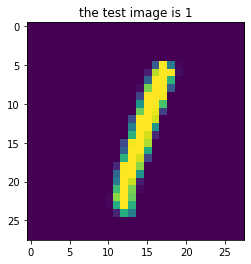

In [7]:
from matplotlib import pyplot as plt
def plotTestImage(index):
    plt.title("the test image is %d"%test_labels[index])
    plt.imshow(test_images[index])
    plt.show()
plotTestImage(5)

In [8]:
trainHistory = model.fit(trainImages, trainLabels, epochs=20, validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0049 - accuracy: 0.9984 - val_loss: 0.0064 - val_accuracy: 0.9978
Epoch 2/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0034 - val_accuracy: 0.9988
Epoch 3/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0101 - val_accuracy: 0.9957
Epoch 4/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0061 - val_accuracy: 0.9980
Epoch 5/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0052 - accuracy: 0.9985 - val_loss: 0.0081 - val_accuracy: 0.9972
Epoch 6/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0047 - val_accuracy: 0.9987
Epoch 7/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.0091 - val_accuracy:

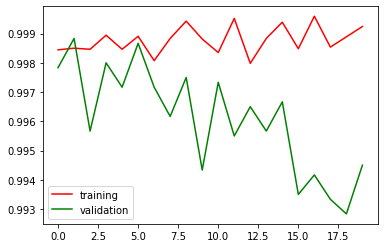

In [9]:
plt.plot(trainHistory.history['accuracy'],color='red')
plt.plot(trainHistory.history['val_accuracy'], color='green')
plt.legend(['training', 'validation'])

In [15]:
import pandas as pd
pd.crosstab(test_labels, predict, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,1,0,0,0,2,3,0,1,2
1,0,1122,4,1,0,1,1,1,4,1
2,6,0,1018,0,1,0,1,2,4,0
3,1,0,6,984,0,5,0,2,9,3
4,2,1,4,1,958,0,4,0,2,10
5,2,0,0,12,1,871,1,0,5,0
6,4,3,4,1,4,7,930,0,5,0
7,2,6,13,2,2,0,1,988,4,10
8,0,0,4,1,5,5,1,1,952,5


In [16]:
measure1 = pd.DataFrame({'label':test_labels, 'predict':predict})
measure1[:20]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [17]:
# depend on your result
measure1[(measure1.label==7) & (measure1.predict==2)]

,label,predict
810,7,2
1039,7,2
1226,7,2
1326,7,2
1754,7,2
2016,7,2
3751,7,2
4837,7,2
7432,7,2
9009,7,2


In [18]:
# depend on your result
error_2_7 = measure1[(measure1.label==7) & (measure1.predict==2)]

Int64Index([810, 1039, 1226, 1326, 1754, 2016, 3751, 4837, 7432, 9009, 9015,
            9019, 9024],
           dtype='int64')


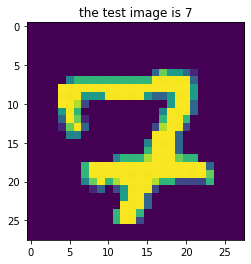

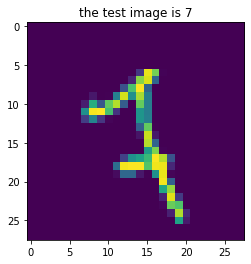

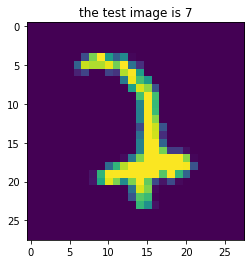

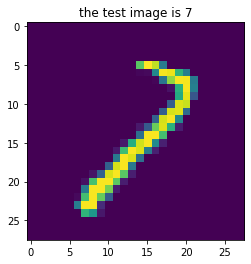

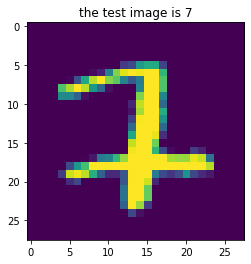

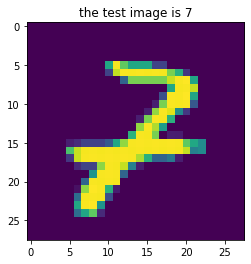

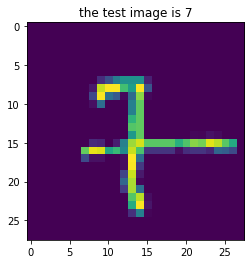

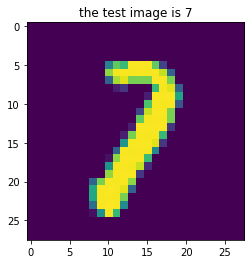

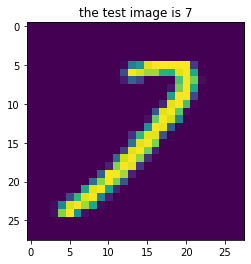

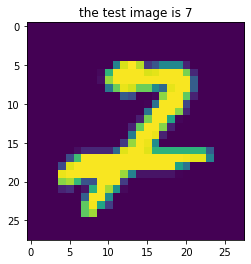

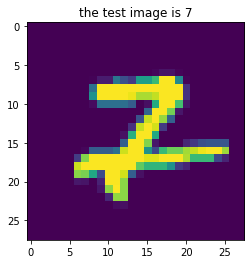

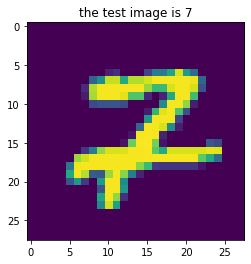

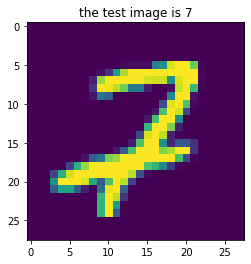

In [19]:
print(error_2_7.index)
for i in error_2_7.index:
    plotTestImage(i)